**Neural network that classifies digits** 

Resources: 
[3Blue1Brown, Neural Networks series](https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi) - video series explaining the maths behind neural networks
[Micheal Nielson Book and Code for Digits](http://neuralnetworksanddeeplearning.com/) - online book explaining with code how to explicitly create a neural network from first principles to classify digits
[The Data Frog, Scikitlearn Code for Digits](https://thedatafrog.com/en/articles/handwritten-digit-recognition-scikit-learn/) - resource for scikitlearn code to classify digits

In [7]:
import matplotlib.pyplot as plt
import numpy as np

We now load in the digit dataset. It should be noted the original dataset is of higher resolution, however the scikitlearn version is lower to make the training and testing faster. 

In [ ]:
from sklearn import datasets
digits=datasets.load_digits()
print(dir(digits))
print(digits.images.shape) #Show there are 1797 images each 
print(digits.images[0]) #This is the 8 x 8 image

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']
(1797, 8, 8)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


Can you see what digit the image is?

0


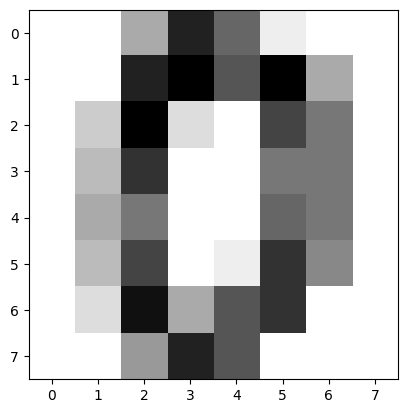

In [9]:
print(digits.target[0])
plt.imshow(digits.images[0],cmap='binary')
plt.show()

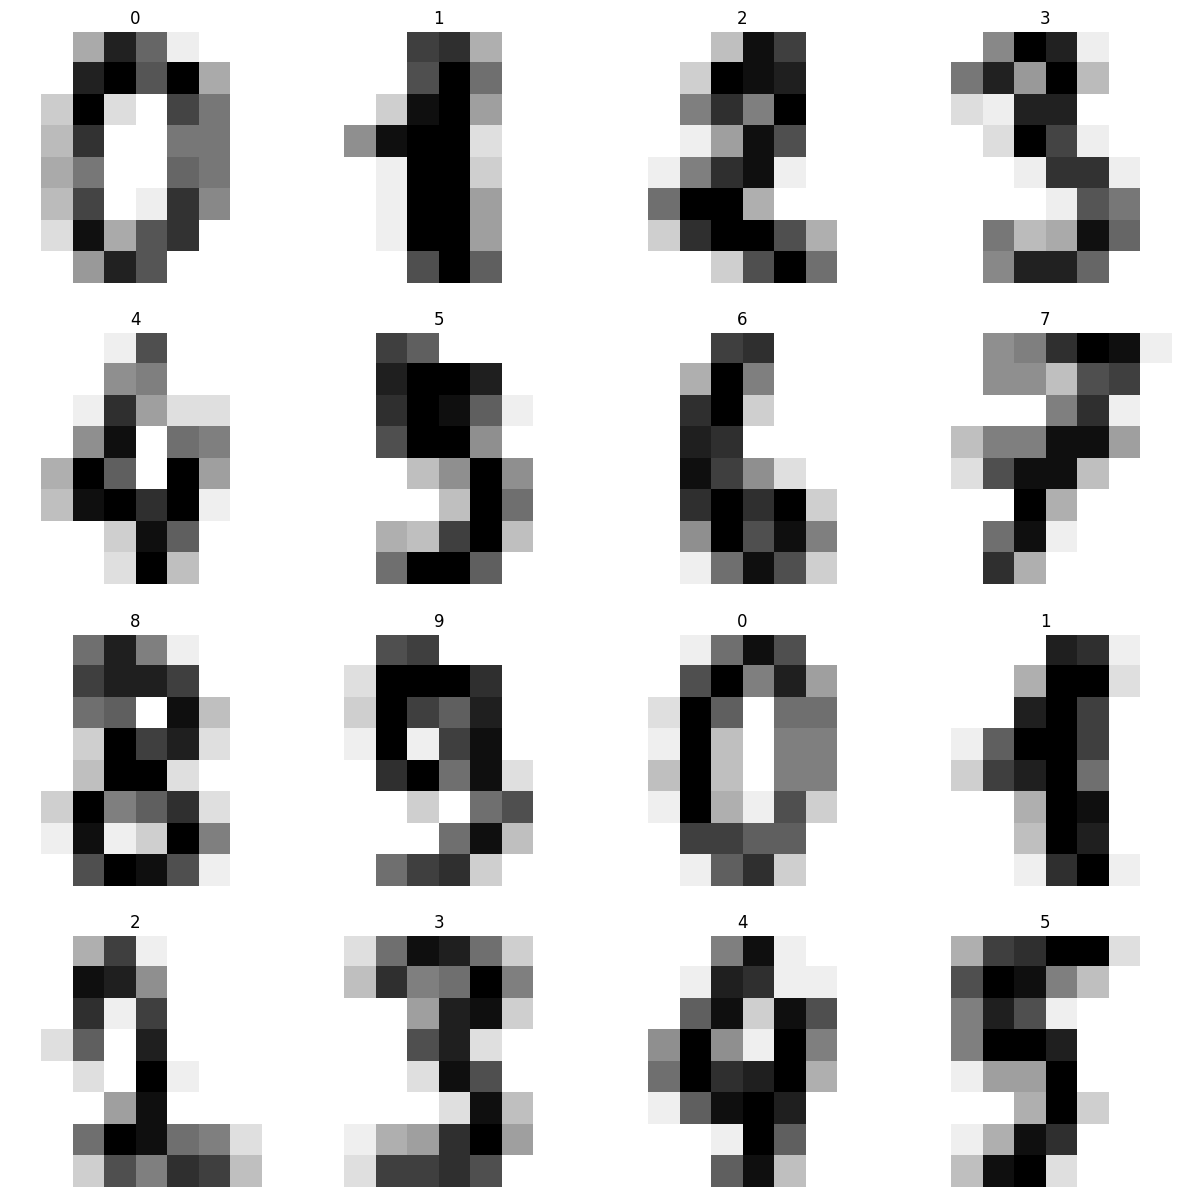

In [10]:
def plot_multi():
    nplots = 16
    fig = plt.figure(figsize=(15,15))
    for j in range(nplots):
        plt.subplot(4,4,j+1)
        plt.imshow(digits.images[j], cmap='binary')
        plt.title(digits.target[j])
        plt.axis('off')
    plt.show()
plot_multi()

We can now begin to create the model. 

In [11]:
y=digits.target
x=digits.images.reshape(digits.images.shape[0],-1) #Here reshape flattens our 8x8 array into a 64x1 array
print(x.shape)
print(x[0]) #Can see how the 8x8 image from before is flattened into a 64x1 array

(1797, 64)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


We now split our data into training and testing data. If too much of our data was used for training then we would likley overfit, making it worse at unseen examples.  

Here we import a [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) network, this stands for a Multi-Layer Perceptron Classifier. It is a network that is especially designed for classification problems. It optimizes the log-loss function using LBFGS or stochastic gradient descent. 

Let us talk through each of the parameters we input into it:
`hidden_layer_sizes=(15,)`: We have added a single hidden layer with 15 neurons.
`activation='logistic'`: The logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).
`alpha=1e-4`: Strength of the L2 regularization term (this technique adds a penalty term to the loss function, proportional to the squared magnitude of the model's weights). Alpha determines how much the model's weights are penalized. A higher alpha value results in stronger regularization, leading to smaller weights and a simpler model, which can help prevent overfitting. Conversely, a lower lambda results in weaker regularization, potentially allowing the model to fit the training data more closely, but also increasing the risk of overfitting.
`solver='sgd'`: Refers to stochastic gradient descent.
`tol=1e-4`: Tolerance for the optimization. When the loss is not improving by at least tol for consecutive iterations convergence is considered to be reached and training stops.
`random_state=1`: Determines random number generation for weights and bias initialization, fixing it to be an integer means we obtain the same random numbers each time we call it. This is the random point we start at before gradient decent towards some local minima. 
`learning_rate_init=.1`: The initial learning rate used. It controls the step-size in updating the weights.
`verbose=True`: Prints progress messages


In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(15,), activation='logistic', alpha=1e-4, solver='sgd', tol=1e-4, random_state=1, learning_rate_init=.1, verbose=True)

We can now train the neural network. This constitutes running the gradient decent algorithm on the loss function of the successive weights (wi) and bias (ai) which constitute each iteration of the network to determine a new more optimal network. Recall, we start with a random state and gradient descent takes us to a local minima, and so some local minima will be lower (more optimal) than others.  

We now split our data into training and testing data. If too much of our data was used for training then we would likley overfit, making it worse at unseen examples.  We take the first 1000 examples to be the training data, and leave the remaining 797 for testing. 

In [73]:
x_train = x[:1000]
y_train = y[:1000]
x_test = x[1000:]
y_test = y[1000:]

mlp.fit(x_train,y_train)

Iteration 1, loss = 2.22958289
Iteration 2, loss = 1.91207743
Iteration 3, loss = 1.62507727
Iteration 4, loss = 1.32649842
Iteration 5, loss = 1.06100535
Iteration 6, loss = 0.83995513
Iteration 7, loss = 0.67806075
Iteration 8, loss = 0.55175832
Iteration 9, loss = 0.45840445
Iteration 10, loss = 0.39149735
Iteration 11, loss = 0.33676351
Iteration 12, loss = 0.29059880
Iteration 13, loss = 0.25437208
Iteration 14, loss = 0.22838372
Iteration 15, loss = 0.20200554
Iteration 16, loss = 0.18186565
Iteration 17, loss = 0.16461183
Iteration 18, loss = 0.14990228
Iteration 19, loss = 0.13892154
Iteration 20, loss = 0.12833784
Iteration 21, loss = 0.12138920
Iteration 22, loss = 0.11407971
Iteration 23, loss = 0.10677664
Iteration 24, loss = 0.10037149
Iteration 25, loss = 0.09593187
Iteration 26, loss = 0.09250135
Iteration 27, loss = 0.08676698
Iteration 28, loss = 0.08356043
Iteration 29, loss = 0.08209789
Iteration 30, loss = 0.07649168
Iteration 31, loss = 0.07410898
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(15,),
              learning_rate_init=0.1, random_state=1, solver='sgd',
              verbose=True)

We just trained our model! Great, now we see its predictions. Let us see what it thinks of the last 16 example (which importantly was not in our training set, made of the first 1000 examples). 

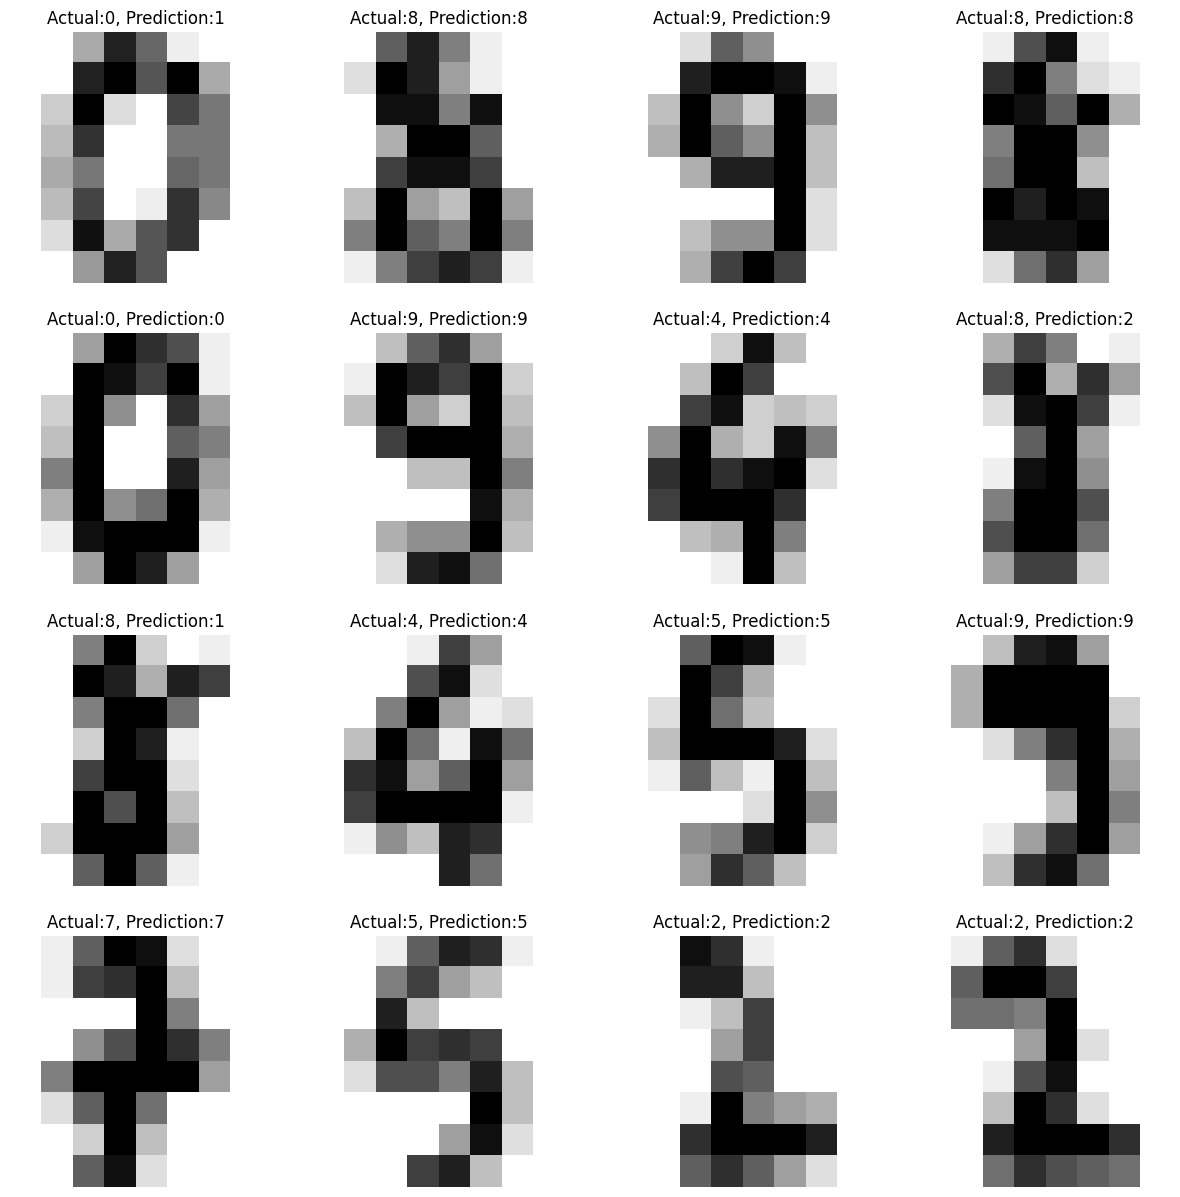

In [74]:
predictions = mlp.predict(x_test)

def plot_multi():
    nplots = 16
    fig = plt.figure(figsize=(15,15))
    for j in range(nplots):
        plt.subplot(4,4,j+1)
        plt.imshow(digits.images[-j], cmap='binary')
        plt.title("Actual:"+str(digits.target[-j])+", Prediction:"+str(predictions[-j]))
        plt.axis('off')
    plt.show()
plot_multi()

Finally, let us check the accuracy of our model. 

In [75]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9146800501882058

We can view each of the neurons for our model above. One can image that if we were to articficial create theses one would see a neuron with 1's to make holes, and 1's to make lines. In fact we find the neurons seem to detect pixels in positions that to a human illogically correspond to digits. See [Visualization of MLP weights on MNIST](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html). 

15


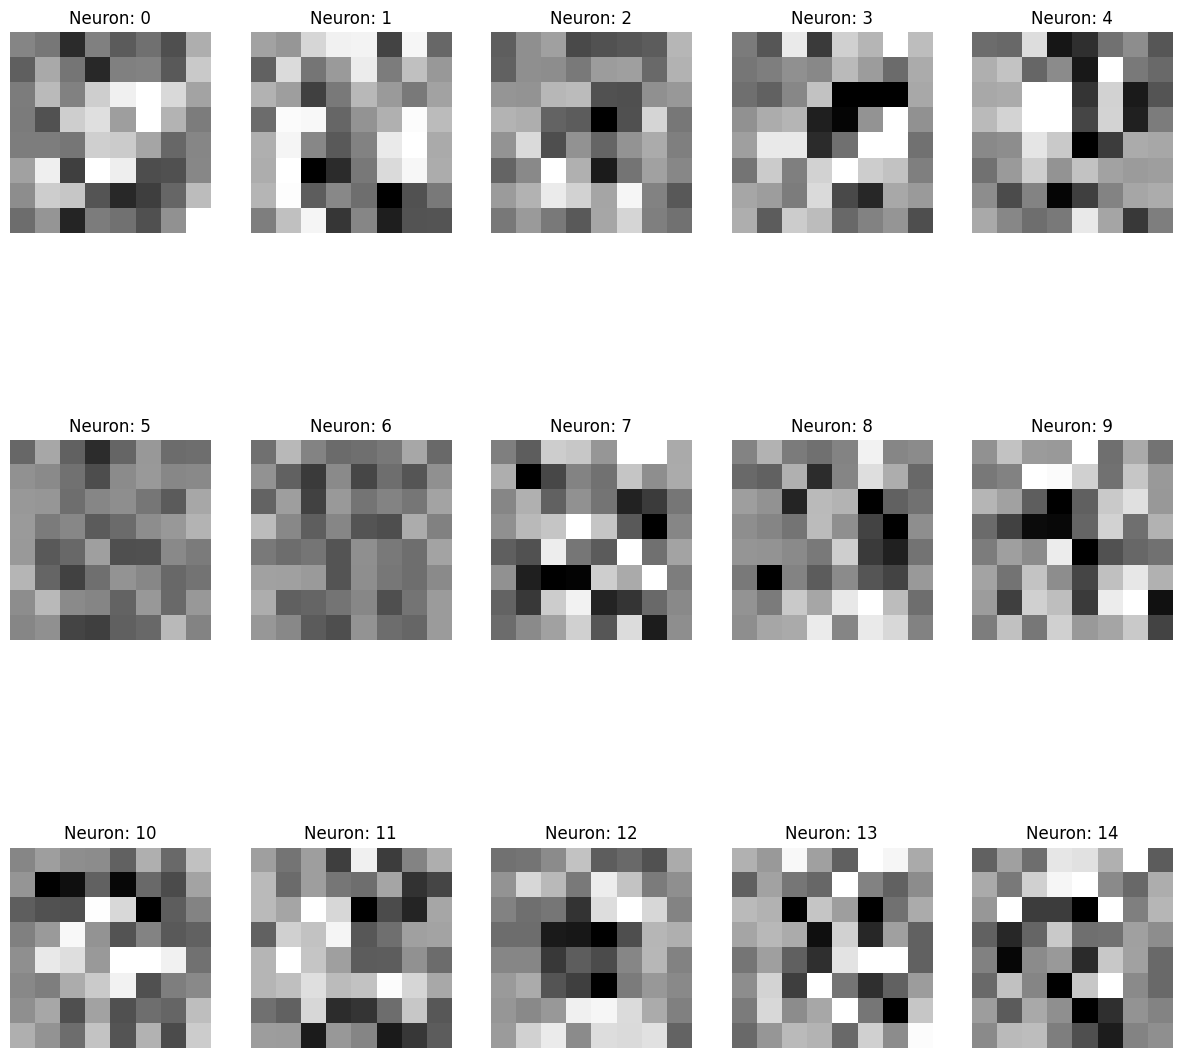

In [85]:
neurons=mlp.coefs_[0].T #These are the weight matrices of the connections between the intial layer and the hidden layer neurons

print(len(neurons)) 

def plot_multi():
    nplots = 20
    fig = plt.figure(figsize=(15,15))
    for j in range(len(neurons)):
        plt.subplot(3,5,j+1)
        neuron=neurons[j].reshape(8,8)
        plt.imshow(neuron, vmin=0.5*mlp.coefs_[0].min(), vmax=0.5*mlp.coefs_[0].max(), cmap=plt.cm.gray) #need to set max and min weights so can rescale to 0-1
        plt.title("Neuron: "+str(j))
        plt.axis('off')
    plt.show()
plot_multi()

This tells us 91% of the time we are correct and the remaining 9% we got it wrong. Not too bad. The next stage would be to try and tweak our network and methods to obtain a better score. Maybe try and add more layers, and more neurons? See [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) to find the options for what you can and cant change. 

By experimenting for example I found if I increase the nuerons in a single hidden layer, things get much better, however if I add more layers things seem to get worse. Moreover, switching to using 'relu' as the activation function gives terrible results. 

In [ ]:
mlp2 = MLPClassifier(hidden_layer_sizes=(100,), activation='logistic', alpha=1e-4, solver='sgd', tol=1e-4, random_state=1, learning_rate_init=.1)

x_train = x[:1000]
y_train = y[:1000]
x_test = x[1000:]
y_test = y[1000:]

mlp2.fit(x_train,y_train)
predictions = mlp.predict(x_test)
accuracy_score(y_test, predictions)

0.9485570890840652